In [1]:
# import Pandas
import pandas as pd

# import os
import os

# import numpy
import numpy as np

# import pyplot
import matplotlib.pyplot as plt

In [2]:

final_df = pd.read_csv(os.path.join("../stats/final_combine_player_data.csv"))
final_df.head()

,Year,Name,Age,PER,GS,GP,TS%,FTr,OWS,DWS,...,player_height,player_weight,Salary Cap,Injury_DTD,Injury_DNP,Injury_Out_Indef,Injury_Out_Season,Injury_Returned,Injury_Other,Salary%
0,2010,Aaron Brooks,25.0,16.00,82.0,82.0,0.549,0.2240,3.900,1.600,...,182.88,73.028312,57700000,0.0,0.0,0.0,0.0,0.0,0.0,3.495133
1,2010,Acie Law,25.0,15.05,0.5,13.0,0.584,0.6905,0.175,0.075,...,190.50,91.625584,57700000,0.0,0.0,0.0,0.0,0.0,0.0,1.097492
2,2010,Al Harrington,29.0,16.80,15.0,72.0,0.546,0.3080,2.200,1.300,...,205.74,113.398000,57700000,0.0,0.0,0.0,0.0,0.0,0.0,9.991334
3,2010,Al Horford,23.0,19.40,81.0,81.0,0.594,0.3190,6.900,3.900,...,208.28,111.130040,57700000,0.0,0.0,0.0,0.0,0.0,0.0,9.436494
4,2010,Al Jefferson,25.0,19.00,76.0,76.0,0.524,0.2360,2.300,2.300,...,208.28,127.005760,57700000,0.0,0.0,0.0,0.0,0.0,0.0,22.530329


[]

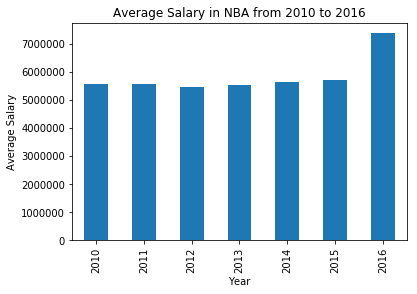

In [3]:
#DATA EXPLORATION
#Get mean of average NBA Salary from each year to show that it doesn't make sense to look at absolute salaries
sal=final_df.groupby('Year')['Salary'].mean()
var=sal.plot.bar(x='Year', y='Salary')
var.set_ylabel("Average Salary")
var.set_title("Average Salary in NBA from 2010 to 2016")
var.plot()

[]

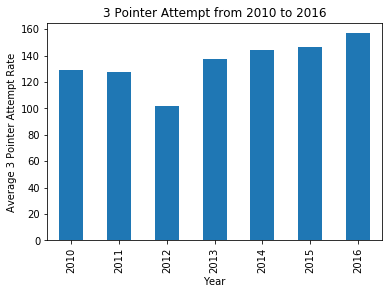

In [4]:

#Plot showing how 3 Point Attempt has changed over time
threePM=final_df.groupby('Year')['3PA'].mean()
graph=threePM.plot.bar()
graph.set_ylabel('Average 3 Pointer Attempt Rate')
graph.set_title('3 Pointer Attempt from 2010 to 2016')
graph.plot() 

Text(0.5,1,'True Shooting % from 2010 to 2016')

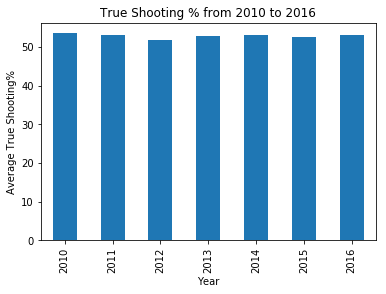

In [5]:
#More data exploration, looking at how an advanced metric, True Shooting %, has changed over time
ts=final_df.groupby('Year')['TS%'].mean()
ts=ts*100
graph=ts.plot.bar()
graph.set_ylabel('Average True Shooting%')
graph.set_title('True Shooting % from 2010 to 2016')

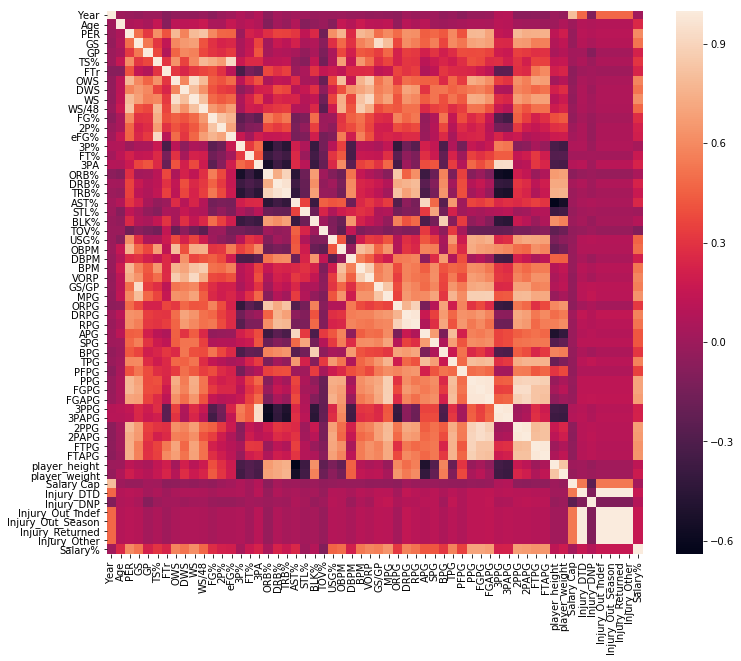

In [6]:
#remove salary in heatmap, store in separate variable
salary=final_df['Salary']
stats=final_df.drop('Salary', axis=1)


#setting up heatmap for correlations between all statistics
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
corr = stats.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)

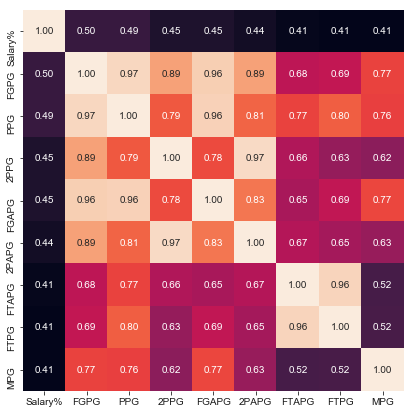

In [7]:
#function that creates heatmaps for the 8 variables that are most strongly correlated with Salary% for each of the data subsets
def heatMap(df, k):
    corrmat = df.corr(method='pearson', min_periods=1)
    r_square = corrmat ** 2
    ## Top K-1 correlated variables
    cols = r_square.nlargest(k, 'Salary%')['Salary%'].index
    cm = df[cols].corr()
    cm_square = cm ** 2
    f, ax = plt.subplots(figsize=(7, 7))
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm_square, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
heatMap(stats, 9)

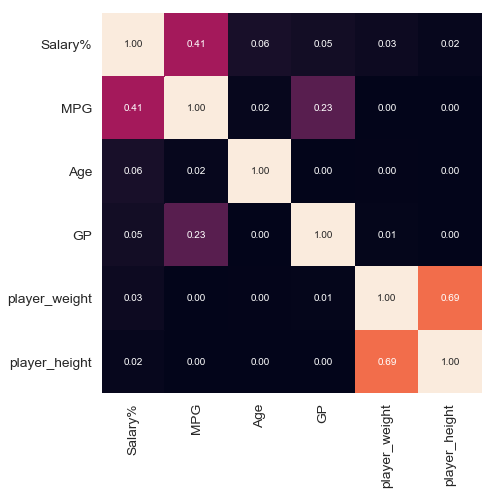

In [8]:
#splitting stats into 4 categories for later on, when looking at which group of stats is the best predictor of salary
physical=['Salary%', 'Age', 'player_height', 'player_weight','GP','MPG']
performance_regular=['Salary%','ORPG', 'DRPG', 'RPG', 'APG', 'SPG', 'BPG', 'TPG', 'PFPG', 'PPG', 'FGPG', 'FGAPG', '3PPG', '3PAPG', '2PPG', '2PAPG', 'FTPG', 'FTAPG']
performance_advanced=['Salary%','PER', 'TS%', '3PA', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']
injuries=['Salary%','Injury_DTD','Injury_DNP','Injury_Out_Indef','Injury_Out_Season','Injury_Returned','Injury_Other']

physical_stats=stats[physical]
performance_regular_stats=stats[performance_regular]
performance_advanced_stats=stats[performance_advanced]
injury_stats=stats[injuries]


#physical only has 6
heatMap(physical_stats, 7)

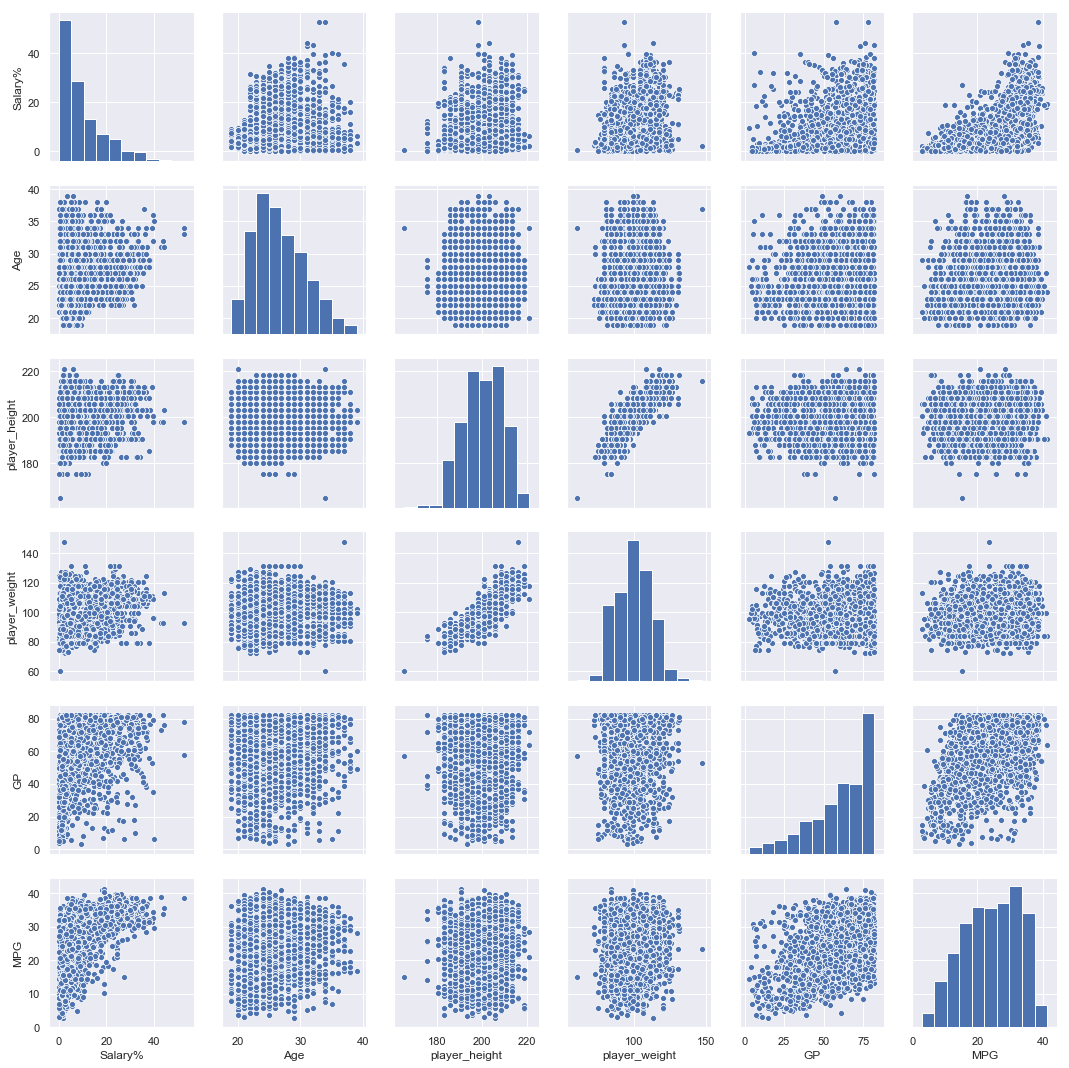

In [9]:

#creating scatter plots to further look at the relationships between Salary% and physical characteristics
sns.set()
sns.pairplot(physical_stats, height=2.5)
plt.show()

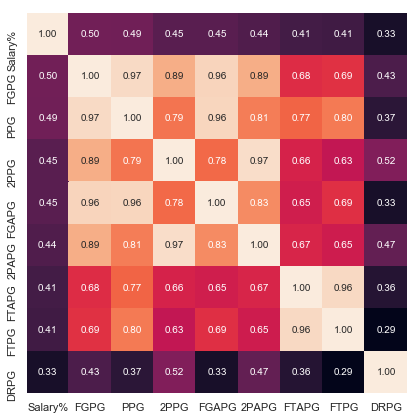

In [13]:
heatMap(performance_regular_stats, 9)

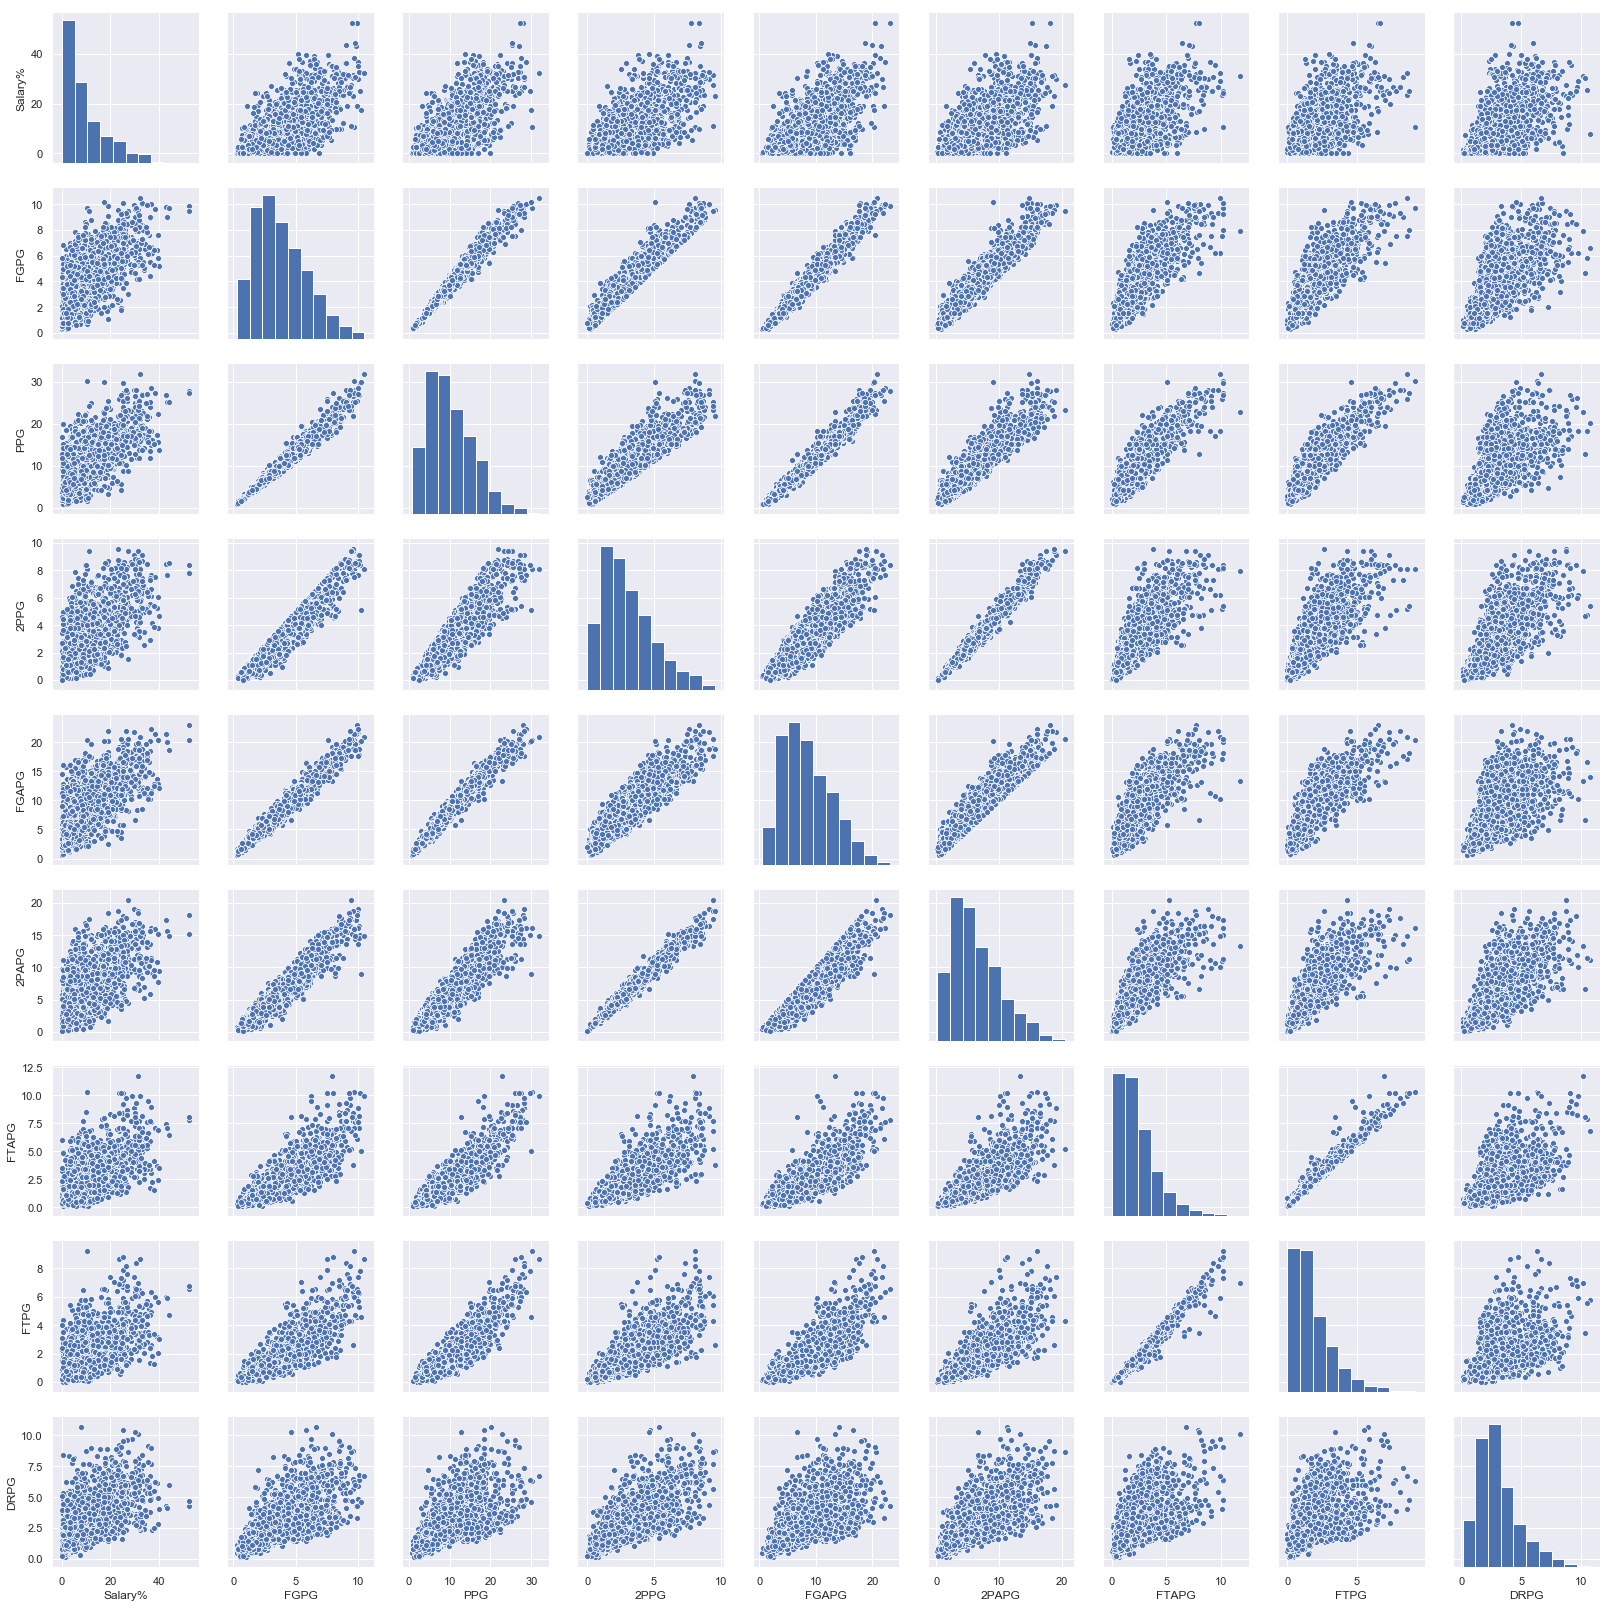

In [14]:
#creating scatter plots to further look at the relationships between Salary% and regular performances
reg=['Salary%', 'FGPG', 'PPG','2PPG','FGAPG','2PAPG','FTAPG','FTPG','DRPG']
sns.set()
sns.pairplot(performance_regular_stats[reg], height=2.5)
plt.show()

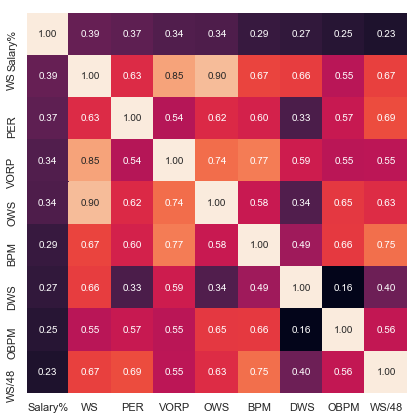

In [15]:
heatMap(performance_advanced_stats, 9)

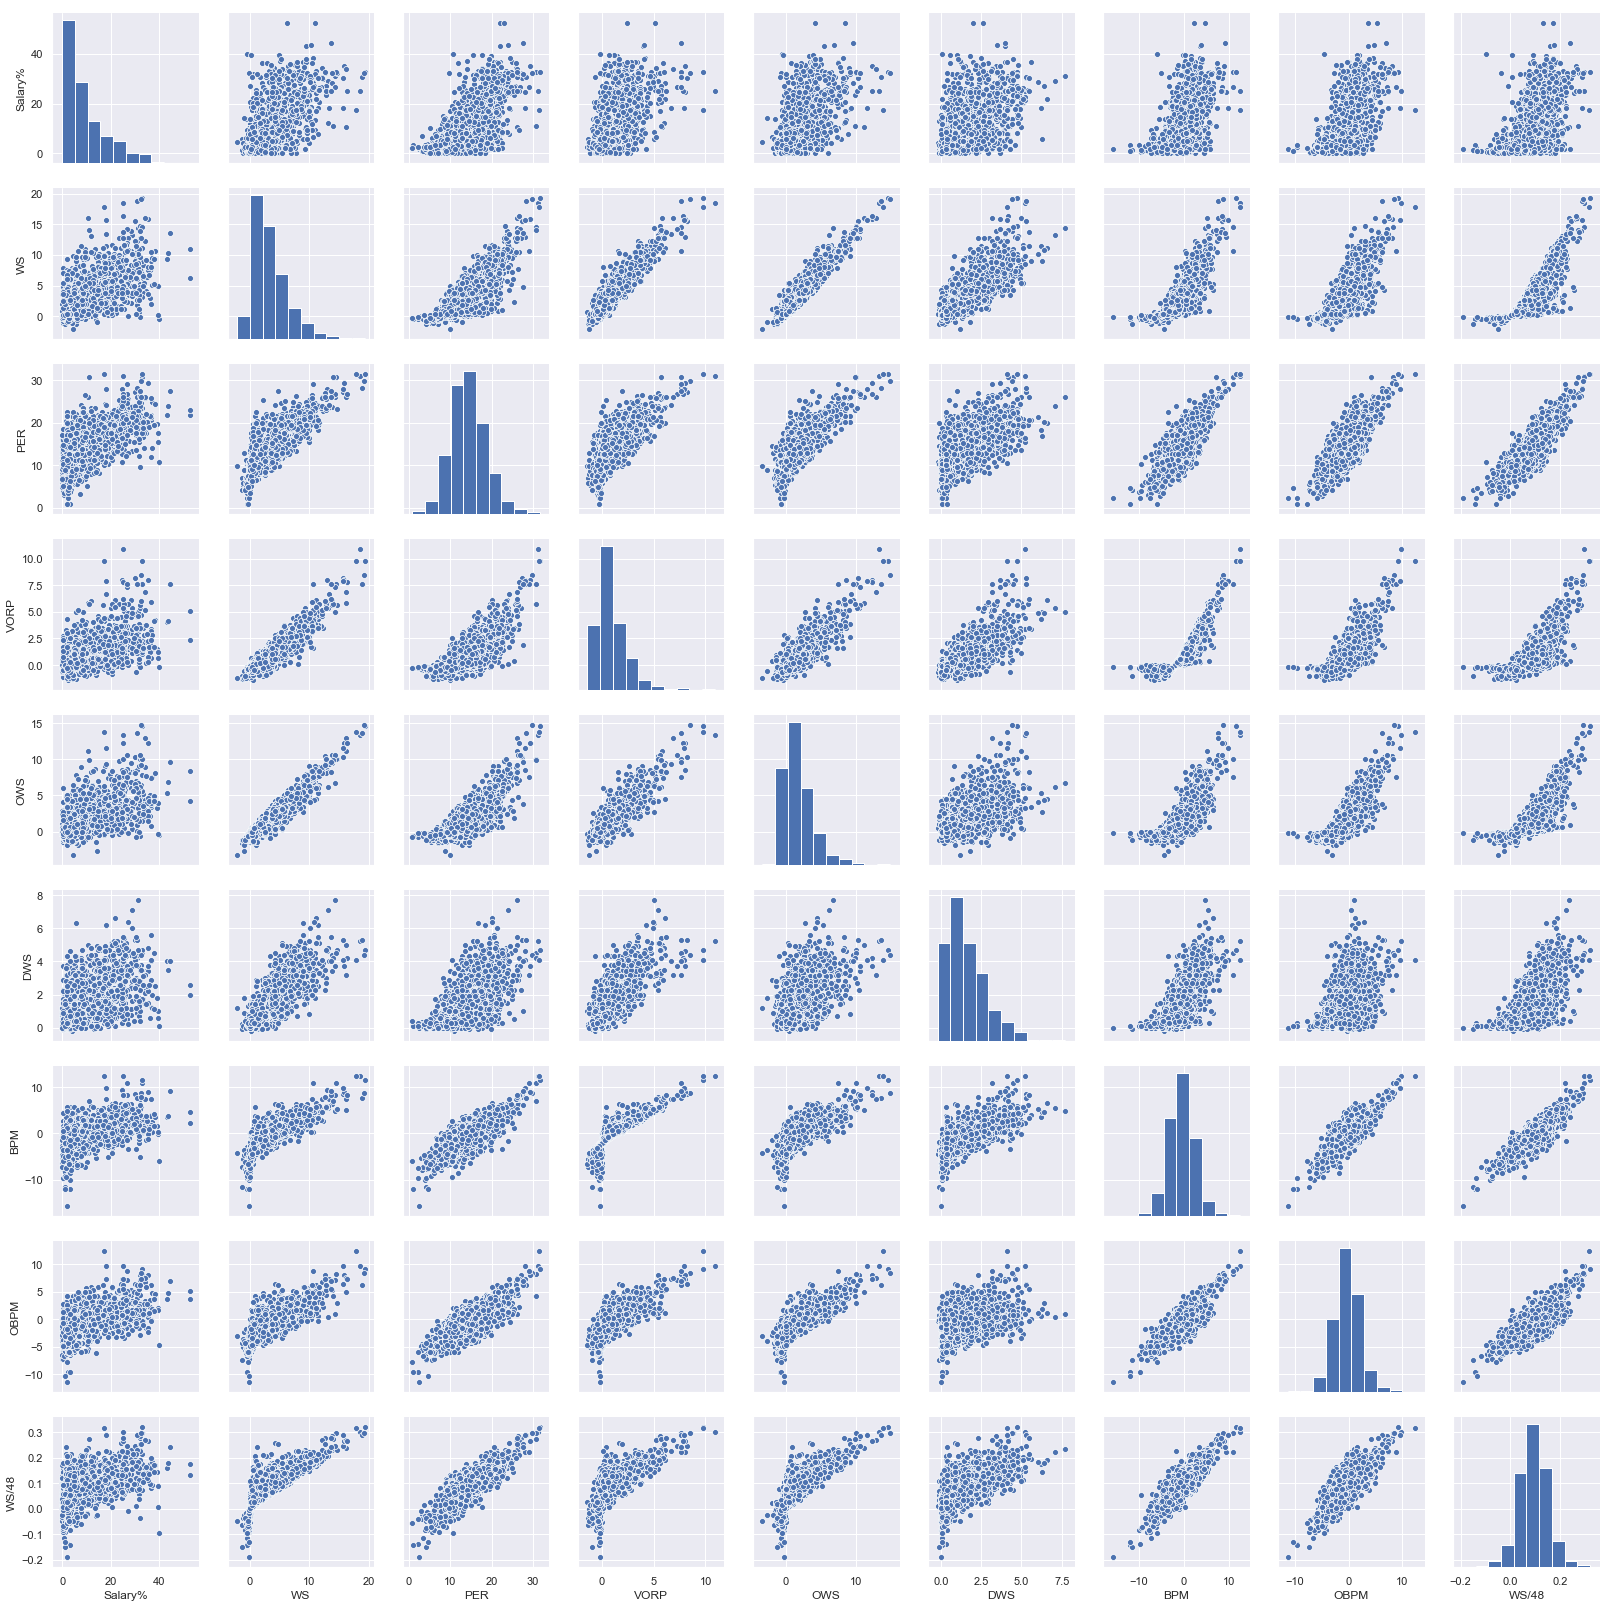

In [16]:
adv=['Salary%', 'WS', 'PER','VORP','OWS','DWS','BPM','OBPM','WS/48']
sns.set()
sns.pairplot(performance_advanced_stats[adv], height=2.5)
plt.show()

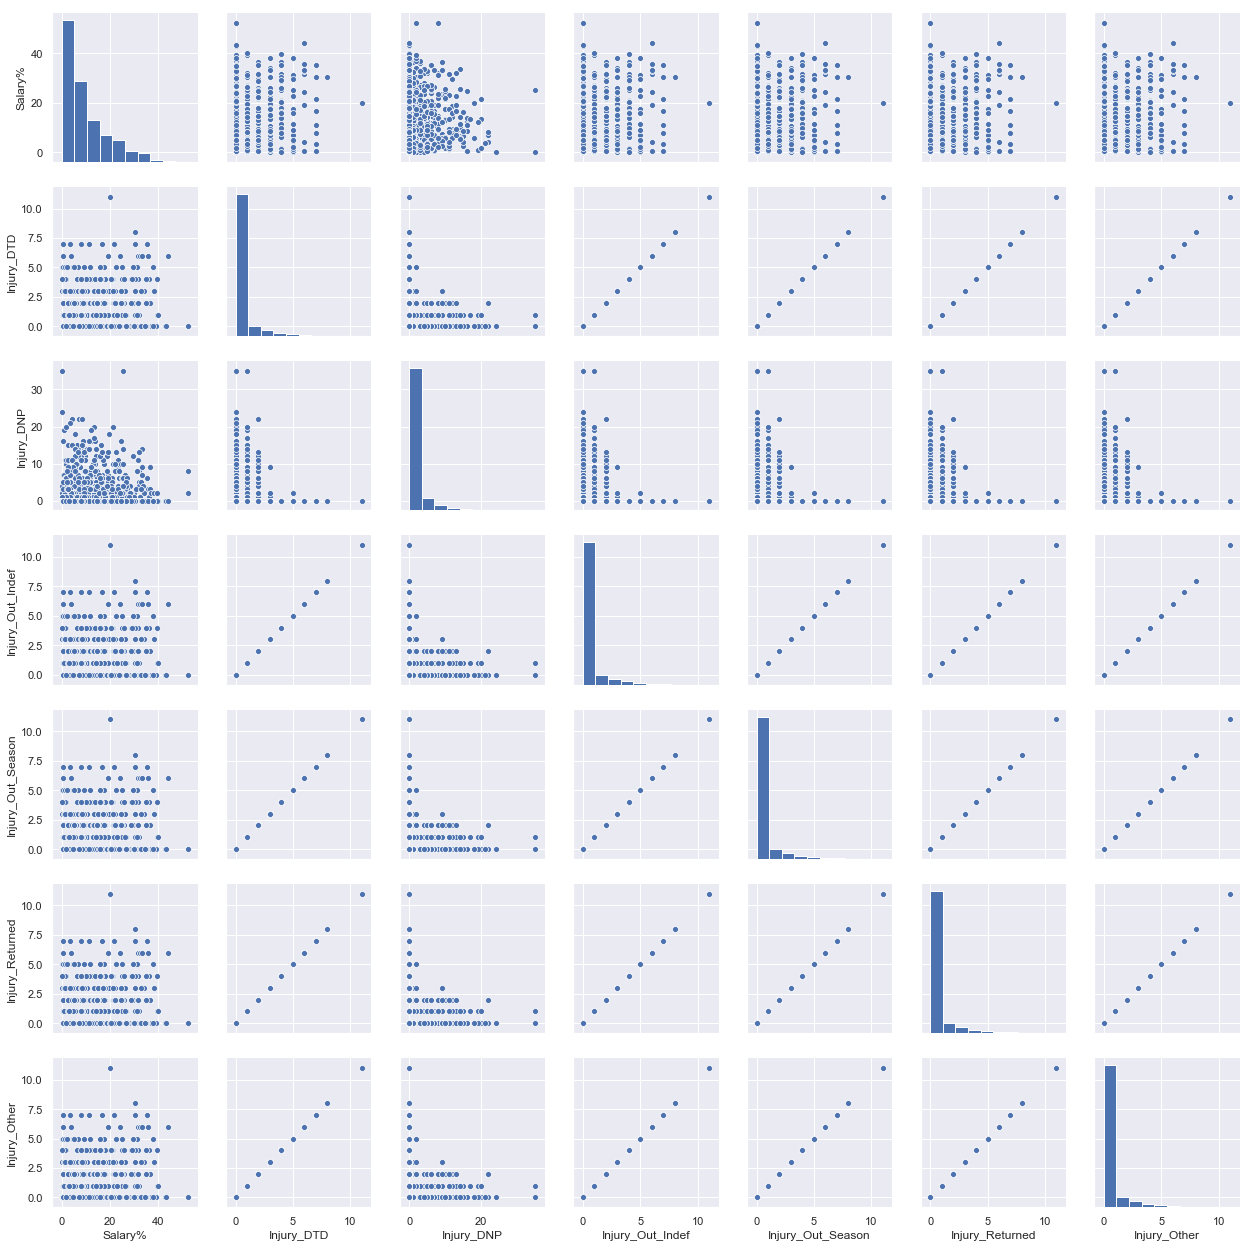

In [12]:
#creating scatter plots to further look at the relationships between Salary% and injuries
sns.set()
sns.pairplot(injury_stats, height=2.5)
plt.show()

In [54]:
#see if any variables are multicollinear, if so they can be removed
x = performance_advanced_stats[['WS','PER','VORP','OWS','DWS','BPM','OBPM','WS/48']]
phyDF=physical_stats[['Age','player_height','player_weight','GP','MPG']]
z=performance_regular_stats[['FGPG','PPG','2PPG','FGAPG','2PAPG','FTAPG','FTPG','DRPG']]
inDF=injury_stats[['Injury_DTD','Injury_DNP','Injury_Out_Indef','Injury_Out_Season','Injury_Returned','Injury_Other']]

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)
    
#lower VIF factor values means less multicollinearity

,VIF Factor,features
0,9031.9,WS
1,22.8,PER
2,16.8,VORP
3,3537.7,OWS
4,1689.1,DWS
5,10.0,BPM
6,5.9,OBPM
7,24.0,WS/48


In [55]:
#remove OWS and DWS from advanced because their VIF factor values are far too high
advancedDF = performance_advanced_stats[['WS', 'VORP','PER','BPM','OBPM','WS/48']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(advancedDF.values, i) for i in range(advancedDF.shape[1])]
vif["features"] = advancedDF.columns
vif.round(1)

,VIF Factor,features
0,23.5,WS
1,16.7,VORP
2,21.2,PER
3,8.2,BPM
4,3.1,OBPM
5,23.3,WS/48


In [56]:

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(phyDF.values, i) for i in range(phyDF.shape[1])]
vif["features"] = phyDF.columns
vif.round(1)

# player_height and player_weight are a little bit high

,VIF Factor,features
0,39.8,Age
1,204.0,player_height
2,147.7,player_weight
3,14.5,GP
4,11.9,MPG


In [57]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
vif["features"] = z.columns
vif.round(1)


/Users/Guobao/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,inf,FGPG
1,inf,PPG
2,inf,2PPG
3,1001.9,FGAPG
4,946.3,2PAPG
5,112.6,FTAPG
6,inf,FTPG
7,8.8,DRPG


In [58]:
#remove: 2ppg because it's very similar to ppg. fgpg is correlated with fgapg as well. 
#FTPG correlated with FTAPG and FGPG correlated with PPG, so removed  those as well
regularDF=performance_regular_stats[[ 'PPG','2PAPG','FTAPG','DRPG']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(regularDF.values, i) for i in range(regularDF.shape[1])]
vif["features"] = regularDF.columns
vif.round(1)

,VIF Factor,features
0,26.9,PPG
1,23.3,2PAPG
2,11.5,FTAPG
3,6.6,DRPG


In [59]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(inDF.values, i) for i in range(inDF.shape[1])]
vif["features"] = inDF.columns
vif.round(1)

/Users/Guobao/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,inf,Injury_DTD
1,1.0,Injury_DNP
2,inf,Injury_Out_Indef
3,inf,Injury_Out_Season
4,inf,Injury_Returned
5,inf,Injury_Other


Root Mean Squared Error is : 6.530411227242128
R sq is : 0.46080478728968344


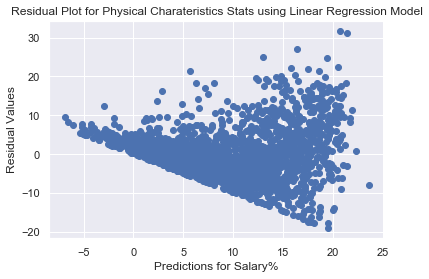

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.linear_model import LinearRegression

#target array
y=stats[['Salary%']]

#PHYSICAL STATS
linreg = LinearRegression()

#Linear regression on all three subsets of data to see which scores the best
x_train, x_test, y_train, y_test=train_test_split(phyDF, y, test_size=0.2, random_state=123)
linreg.fit(x_train, y_train)
predictions=linreg.predict(x_test)

#cross validate model
predict = cross_val_predict(linreg, phyDF, y, cv=6)

#get RMSE and R^2 values
rmse = np.sqrt(mean_squared_error(predict, y))
score = metrics.r2_score(y, predict)
print ('Root Mean Squared Error is :', rmse)
print ('R sq is :', score)

#create residual plot
residuals = y - predict
plt.scatter(predict, residuals)
plt.xlabel('Predictions for Salary%')
plt.ylabel('Residual Values')
plt.title('Residual Plot for Physical Charateristics Stats using Linear Regression Model')
plt.show()

Root Mean Squared Error is : 8.869864387232548
R sq is : 0.005284404282202448


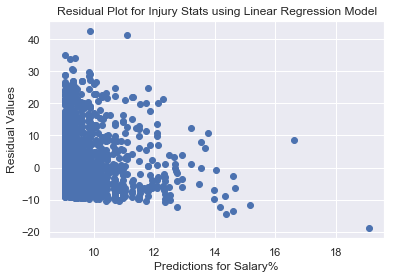

In [26]:
#INJURY STATS
x_train, x_test, y_train, y_test=train_test_split(injuryDF, y, test_size=0.2, random_state=123)
linreg.fit(x_train, y_train)
predictions=linreg.predict(x_test)

#cross validate model
predict = cross_val_predict(linreg, injuryDF, y, cv=6)

#get RMSE and R^2 values
rmse = np.sqrt(mean_squared_error(predict, y))
score = metrics.r2_score(y, predict)
print ('Root Mean Squared Error is :', rmse)
print ('R sq is :', score)

#create residual plot
residuals = y - predict
plt.scatter(predict, residuals)
plt.xlabel('Predictions for Salary%')
plt.ylabel('Residual Values')
plt.title('Residual Plot for Injury Stats using Linear Regression Model')
plt.show()

Root Mean Squared Error is : 6.597948048574246
R sq is : 0.449594518211221


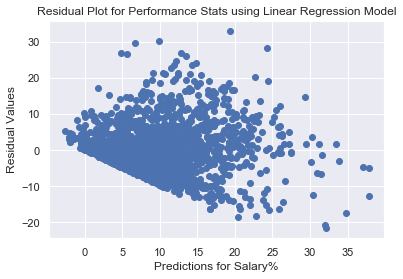

In [28]:
#advanced PERFORMANCE STATS
x_train, x_test, y_train, y_test=train_test_split(advancedDF, y, test_size=0.2, random_state=123)
linreg.fit(x_train, y_train)
predictions=linreg.predict(x_test)

#cross validate model
predict = cross_val_predict(linreg, advancedDF, y, cv=6)

#get RMSE and R^2 values
rmse = np.sqrt(mean_squared_error(predict, y))
score = metrics.r2_score(y, predict)
print ('Root Mean Squared Error is :', rmse)
print ('R sq is :', score)

#create residual plot
residuals = y - predict
plt.scatter(predict, residuals)
plt.xlabel('Predictions for Salary%')
plt.ylabel('Residual Values')
plt.title('Residual Plot for Performance Stats using Linear Regression Model')
plt.show()

Root Mean Squared Error is : 6.123723514811987
R sq is : 0.5258714411020162


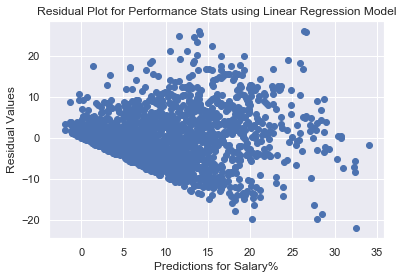

In [29]:
#regular PERFORMANCE STATS
x_train, x_test, y_train, y_test=train_test_split(regularDF, y, test_size=0.2, random_state=123)
linreg.fit(x_train, y_train)
predictions=linreg.predict(x_test)

#cross validate model
predict = cross_val_predict(linreg, regularDF, y, cv=6)

#get RMSE and R^2 values
rmse = np.sqrt(mean_squared_error(predict, y))
score = metrics.r2_score(y, predict)
print ('Root Mean Squared Error is :', rmse)
print ('R sq is :', score)

#create residual plot
residuals = y - predict
plt.scatter(predict, residuals)
plt.xlabel('Predictions for Salary%')
plt.ylabel('Residual Values')
plt.title('Residual Plot for Performance Stats using Linear Regression Model')
plt.show()

In [30]:
#regular Performance Stats had the highest R squared and lowest RMSE values, so that's the subsection that I will be using to look at overvalued and undervalued players
#positive residual=overvalued, negative=undervalued
stats['Predicted Salary%']=predict
stats['Residuals']=residuals
stats['Resid %']=(stats['Residuals']/stats['Salary%']*100)

In [40]:
copy=stats
copy=copy[['Year', 'Name', 'Age','Salary%','PER','Predicted Salary%', 'Residuals']]
copy=copy.sort_values('Residuals')
#get top25 most undervalued players
top25=copy[:25]
top25

,Year,Name,Age,Salary%,PER,Predicted Salary%,Residuals
149,2010,Kevin Durant,21.0,10.491617,26.2,32.587259,-22.095642
426,2011,Kevin Love,22.0,7.941736,24.3,27.866253,-19.924518
264,2010,Troy Murphy,29.0,0.374541,18.0,20.260829,-19.886288
304,2011,Blake Griffin,21.0,9.873682,21.9,28.500936,-18.627254
1510,2015,Kevin Martin,31.0,0.318085,16.7,18.247532,-17.929447
1374,2015,Anthony Davis,21.0,11.211813,30.8,27.570057,-16.358244
36,2010,Brook Lopez,21.0,4.182530,20.1,20.518627,-16.336097
519,2011,Stephen Jackson,32.0,1.825770,14.6,17.830742,-16.004972
1007,2013,Nikola Vucevic,22.0,3.089932,17.8,18.188626,-15.098694
1740,2016,Giannis Antetokounmpo,21.0,4.279173,18.8,19.305092,-15.025919


In [44]:
ageMean=top25['Age'].mean()
print ('Average age is:',ageMean)

percentMean=top25['Salary%'].mean()
print ('Average Salary% is:',percentMean)

perMean=top25['PER'].mean()
print ('Average PER is:',perMean)

residMean=top25['Residuals'].mean()
print ('Average absolute value Residual is:',-1*residMean, '%')

Average age is: 23.56
Average Salary% is: 4.782415672294233
Average PER is: 19.496000000000002
Average absolute value Residual is: 15.489788825472454 %


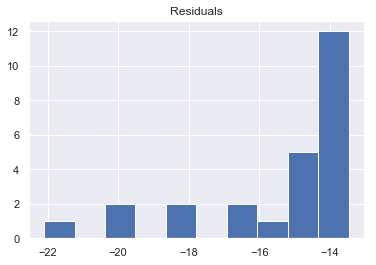

In [45]:
hist=top25.hist(column='Residuals')

In [43]:

#get most overvalued players by residuals
bottom25=copy[-25:]
bottom25

,Year,Name,Age,Salary%,PER,Predicted Salary%,Residuals
199,2010,Nick Collison,29.0,22.998267,13.100000,5.798329,17.199937
1122,2014,Chris Bosh,29.0,35.181922,19.000000,17.746276,17.435646
670,2012,Joe Johnson,30.0,34.030468,18.400000,16.568291,17.462177
1027,2013,Richard Jefferson,32.0,19.030391,10.300000,1.445623,17.584768
425,2011,Kevin Garnett,34.0,36.605065,20.600000,18.757711,17.847354
1653,2016,Allen Crabbe,23.0,26.428571,12.200000,8.152436,18.276136
1819,2016,LeBron James,31.0,44.233500,27.500000,25.937057,18.296443
1688,2016,Chandler Parsons,27.0,31.595357,16.200000,13.231465,18.363892
1145,2014,Derrick Rose,25.0,32.145872,9.700000,13.389026,18.756846
1575,2015,Paul George,24.0,27.146763,13.000000,8.384155,18.762607


In [46]:
ageMean=bottom25['Age'].mean()
print ('Average age is:',ageMean)

percentMean=bottom25['Salary%'].mean()
print ('Average Salary% is:',percentMean)

perMean=bottom25['PER'].mean()
print ('Average PER is:',perMean)

residMean=bottom25['Residuals'].mean()
print ('Average Residual is:',residMean, '%')

Average age is: 30.16
Average Salary% is: 35.69613106693768
Average PER is: 16.937333333333335
Average Residual is: 20.764360562095415 %


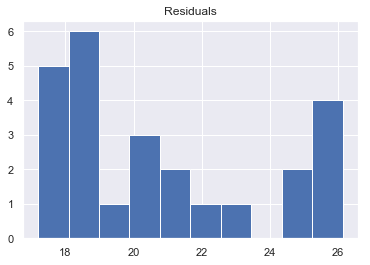

In [47]:
graph=bottom25.hist(column='Residuals')

In [48]:
#trying a different method, because raw residual values tends to discriminate against superstars who are being paid a lot of money

copy2=stats
copy2=copy2[['Year', 'Name', 'Age','Salary%','PER','Predicted Salary%', 'Resid %']]
copy2=copy2.sort_values('Resid %')
top25B=copy2[:25]
top25B

,Year,Name,Age,Salary%,PER,Predicted Salary%,Resid %
900,2013,Greg Smith,22.0,0.026885,16.100000,5.951861,-22038.406557
1764,2016,Jarrett Jack,32.0,0.082389,14.500000,12.949114,-15617.124055
1666,2016,Archie Goodwin,21.0,0.107143,11.100000,7.720366,-7105.674813
1671,2016,Axel Toupane,23.0,0.022050,7.100000,1.499912,-6702.320786
1865,2016,Omri Casspi,27.0,0.197734,13.900000,12.830042,-6388.526652
1510,2015,Kevin Martin,31.0,0.318085,16.700000,18.247532,-5636.692905
1626,2015,Tony Wroten,21.0,0.265450,14.900000,15.138612,-5603.000926
1716,2016,Derrick Williams,24.0,0.164777,17.200000,9.202956,-5485.092703
264,2010,Troy Murphy,29.0,0.374541,18.000000,20.260829,-5309.512891
1746,2016,Hollis Thompson,24.0,0.164777,9.200000,8.313939,-4945.565886


In [49]:
bottom25B=copy2[-25:]
bottom25B

,Year,Name,Age,Salary%,PER,Predicted Salary%,Resid %
873,2013,Diante Garrett,24.0,1.239174,9.000000,-0.407688,132.900024
228,2010,Royal Ivey,28.0,2.079723,10.133333,-0.749213,136.024657
1085,2014,Allen Crabbe,21.0,1.469009,7.700000,-0.571241,138.886147
51,2010,Chris Quinn,26.0,1.393641,9.300000,-0.581080,141.695096
500,2011,Royal Ivey,29.0,2.067397,8.200000,-0.915772,144.295899
1166,2014,Garrett Temple,27.0,1.671951,7.800000,-0.742694,144.420800
1759,2016,James Young,20.0,2.607429,3.600000,-1.163009,144.603680
165,2010,Lester Hudson,25.0,0.893593,13.400000,-0.418845,146.872055
299,2011,Avery Bradley,20.0,2.626421,2.200000,-1.333961,150.790071
204,2010,Patty Mills,21.0,1.624255,11.900000,-0.843771,151.948206


In [50]:
ageMean=bottom25B['Age'].mean()
print ('Average age is:',ageMean)

perMean=bottom25B['PER'].mean()
print ('Average PER is:',perMean)

percentMean=bottom25B['Salary%'].mean()
print ('Average Salary% is:',percentMean)

residMean=bottom25B['Resid %'].mean()
print ('Average absolute value Residual is:',-1*residMean, '%')

Average age is: 24.52
Average PER is: 8.407333333333336
Average Salary% is: 1.1395827875672366
Average absolute value Residual is: -567.441968623941 %


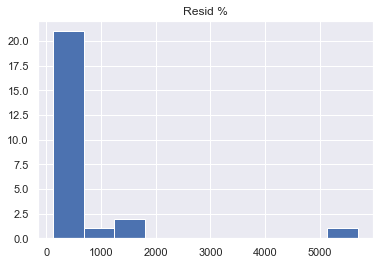

In [51]:
hisB=bottom25B.hist(column='Resid %')

### Resid % (copy2) is a better indicator of who is overvalued and undervalued